In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/harga-real-estate/harga_real_estate.csv


membaca data

In [2]:
data = '../input/harga-real-estate/harga_real_estate.csv'
df = pd.read_csv(data,usecols=["X1_Usia_Rumah","X2_jarak_MRT","X3_jumlah_toko","Y_harga_unit"])
df.head()

,X1_Usia_Rumah,X2_jarak_MRT,X3_jumlah_toko,Y_harga_unit
0,32.0,84.87882,10,37.9
1,19.5,306.59470,9,42.2
2,13.3,561.98450,5,47.3
3,13.3,561.98450,5,54.8
4,5.0,390.56840,5,43.1


memerikasa data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   X1_Usia_Rumah   414 non-null    float64
 1   X2_jarak_MRT    414 non-null    float64
 2   X3_jumlah_toko  414 non-null    int64  
 3   Y_harga_unit    414 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 13.1 KB


In [4]:
df.describe()

,X1_Usia_Rumah,X2_jarak_MRT,X3_jumlah_toko,Y_harga_unit
count,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,37.980193
std,11.392485,1262.109595,2.945562,13.606488
min,0.000000,23.382840,0.000000,7.600000
25%,9.025000,289.324800,1.000000,27.700000
50%,16.100000,492.231300,4.000000,38.450000
75%,28.150000,1454.279000,6.000000,46.600000
max,43.800000,6488.021000,10.000000,117.500000


In [5]:
df.isnull().sum()

X1_Usia_Rumah     0
X2_jarak_MRT      0
X3_jumlah_toko    0
Y_harga_unit      0
dtype: int64

Memeriksa Data dengan grafik

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


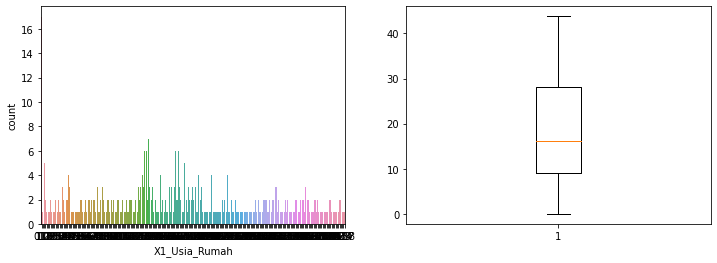

In [6]:
f = plt.figure(figsize = (12,4))
f.add_subplot(1,2,1)

sns.countplot(df['X1_Usia_Rumah'])

f.add_subplot(1,2,2)
plt.boxplot(df['X1_Usia_Rumah'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


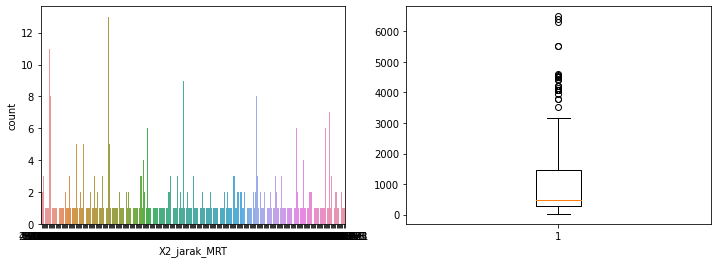

In [7]:
f = plt.figure(figsize = (12,4))
f.add_subplot(1,2,1)

sns.countplot(df['X2_jarak_MRT'])

f.add_subplot(1,2,2)
plt.boxplot(df['X2_jarak_MRT'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


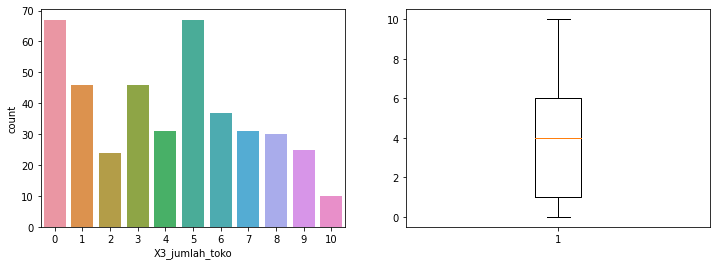

In [8]:
f = plt.figure(figsize = (12,4))
f.add_subplot(1,2,1)

sns.countplot(df['X3_jumlah_toko'])

f.add_subplot(1,2,2)
plt.boxplot(df['X3_jumlah_toko'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


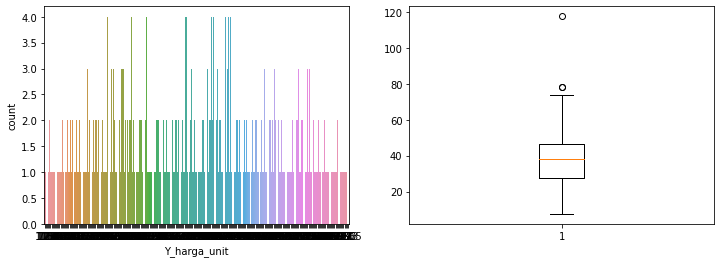

In [9]:
f = plt.figure(figsize = (12,4))
f.add_subplot(1,2,1)

sns.countplot(df['Y_harga_unit'])

f.add_subplot(1,2,2)
plt.boxplot(df['Y_harga_unit'])
plt.show()

mencari korelasi terdekat dengan harga

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

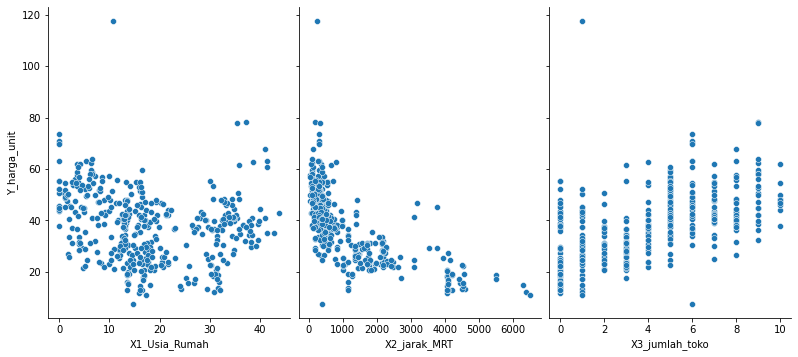

In [10]:
plt.figure(figsize = (10,8))
sns.pairplot(data=df, x_vars=['X1_Usia_Rumah','X2_jarak_MRT','X3_jumlah_toko'],y_vars=['Y_harga_unit'], size = 5, aspect = 0.75)
plt.show()

In [11]:
df.corr().style.background_gradient().set_precision(2)

,X1_Usia_Rumah,X2_jarak_MRT,X3_jumlah_toko,Y_harga_unit
X1_Usia_Rumah,1.00,0.03,0.05,-0.21
X2_jarak_MRT,0.03,1.00,-0.60,-0.67
X3_jumlah_toko,0.05,-0.60,1.00,0.57
Y_harga_unit,-0.21,-0.67,0.57,1.00


mentraining data

In [12]:
x = df.drop(columns = 'Y_harga_unit')
y = df['Y_harga_unit']

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 4)

melihat hasil pembagian data

In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(331, 3)
(83, 3)
(331,)
(83,)


In [15]:
 from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression().fit(x_train, y_train)
lin_reg.score(x_train, y_train)


0.5462821837035738

In [16]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[-0.24842433 -0.00536076  1.08063941]
43.55890526838623


In [17]:
coef_dict = {
    'features': x.columns,
    'coef_value':lin_reg.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features','coef_value'])
coef

,features,coef_value
0,X1_Usia_Rumah,-0.248424
1,X2_jarak_MRT,-0.005361
2,X3_jumlah_toko,1.080639


In [18]:
y_pred = lin_reg.predict(x_test)

0 = usia rumah
1 = jarak mrt
2 = jumlah toko

In [19]:
lin_reg.predict([[45,400,4]])

array([34.55806497])